Les données sont extraites de Bloom. Cependant, nous ne pouvons pas récupérer simultanément les données sur les ratios financiers et les prix des bonds. Il faut récupérer les deux bases de données et les *join* ensuite. 


**Extraction des données sur Bloom - démarche :**

1. **Données ratios financiers. Se mettre à la date de la veille**. Renseigner les critères (EUR, Corporate, date de maturité (partition des bonds selon la date de maturité, choisir la date du dernier bond extrait précédemment), afficher les résultats (seulement 5.000 de visibles). Rajouter les colonnes de variables explicatives intéressantes. Nécessité de garder les colonnes Coupon et Maturity pour le calcul de la PD. Trier selon la date de maturité (croissante), importer sur un doc excel. 

2. Récupérer le Reference Security, qui sera la clé entre les deux datasets. Pour cela sélectionner l'ensemble des bonds, puis "copy selection" et coller à l'excel. Rajoute une nouvelle colonne. 

3. **Données prix. Se mettre à la date du jour.** Aller dans IMGR. Les bonds affichés ont les mêmes critères que ceux donnés dans 1. Trier selon la maturité croissante, importer sur excel. 

4. Refaire en changeant la date de maturité dans les critères pour parcourir les bonds.

5. Sur les tableaux excels : changer les "--" en "" (valeurs manquantes) et "," en "."



In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Join des datasets 

Deux datasets en entrée : 

$-$ dataset sur les caractéristiques des bonds et des entreprises 

$-$ dataset du prix, lequel permet de calculer la probabilité de défaut par l'algo annexe

**Le but :** les rejoindre en un dataset, qui a notamment comme argument *prix* et *maturité* afin de calculer la probabilité de défaut. 

*dataset prix*

In [4]:
prix = pd.read_csv("C:/Users/mathilde.binet/Desktop/PIF/1208/main_prices.csv", sep = ";")
prix = prix[["Reference Security","Bid Price", "Ask Price"]]

In [5]:
def mid_price(row) : 
    bid = row['Bid Price']
    ask = row['Ask Price']
    return (bid+ask)/2 

prix["Mid Price"] = prix.apply(mid_price, axis=1) 

In [7]:
prix.head()

,Reference Security,Bid Price,Ask Price,Mid Price
0,BP432479 Corp,101.651,102.311,101.981
1,BP486833 Corp,101.375,102.875,102.125
2,EJ102177 Corp,102.240,102.660,102.450
3,EK150567 Corp,105.611,105.767,105.689
4,AP137335 Corp,106.301,106.751,106.526


*dataset ratios financiers*

In [8]:
bonds = pd.read_csv("C:/Users/mathilde.binet/Desktop/PIF/1208/main_ratios.csv", sep = ";")

In [10]:
#bonds.rename(columns={'Reference':'Reference Security'}, inplace=True)
bonds = bonds.drop(columns=['Issuer Name','Issue Price','ISIN','Issue Date','Par Amt'])

In [12]:
bonds.head()

,Cpn,Maturity,Common Eqty / Tot Assets,Debt/EBITDA,EBITDA,Earnings Assets / Int Bear Liab,Debt / Common Equity,BCLASS Level 3,TCE Ratio,Interest Coverage Ratio,Risk-Based Cap Ratio,Lev Ratio to TCE,Tier-1 Ratio,Tot Debt / Tot Capital,Reference Security
0,0.00,09/02/2021,12.25730,NaN,NaN,172.981,138.092,Banking,12.09410,NaN,16.01,NaN,NaN,57.0649,BO222253 Corp
1,8.00,09/02/2021,NaN,NaN,NaN,NaN,NaN,Other Financial,NaN,NaN,NaN,NaN,NaN,NaN,EJ087566 Corp
2,0.00,09/02/2021,NaN,NaN,NaN,NaN,NaN,Other Financial,NaN,NaN,NaN,NaN,NaN,NaN,EJ087518 Corp
3,15.00,09/02/2021,NaN,NaN,NaN,NaN,NaN,Other Financial,NaN,NaN,NaN,NaN,NaN,NaN,ZR911049 Corp
4,9.39,09/02/2021,6.11747,NaN,NaN,NaN,659.527,Local Authority,6.03849,NaN,15.80,7.7,NaN,86.8339,ZO186898 Corp


*Merge*

In [13]:
df = pd.merge(prix, bonds, how='inner', on = 'Reference Security')

------------------- 

**Choix de la date de maturité de départ (début du parcours des bonds), élements de réflexion :**

In [15]:
from datetime import datetime, timedelta

def date_delta(row) : 
    day = row["Maturity"]
    delta = pd.to_datetime(day, format='%m/%d/%Y') - datetime.strptime('07/29/2021','%m/%d/%Y')
    return delta.dt.days

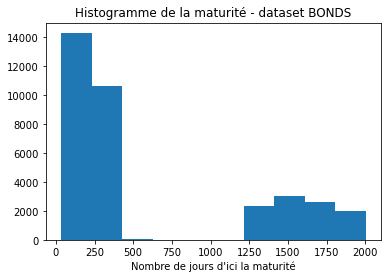

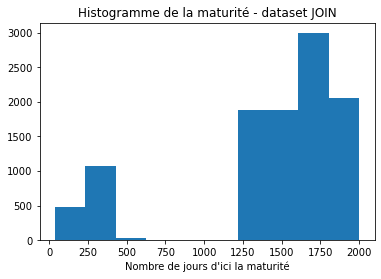

In [21]:
plt.hist(date_delta(bonds))
plt.xlabel("Nombre de jours d'ici la maturité")
plt.title('Histogramme de la maturité - dataset BONDS')
plt.show()

plt.hist(date_delta(df))
plt.xlabel("Nombre de jours d'ici la maturité")
plt.title('Histogramme de la maturité - dataset JOIN')
plt.show()

La démarche à condition qu'on retrouve les mêmes bonds dans le dataset de prix et de ratios financiers. Cela n'est pas forcèment le cas car on ne regarde pas au même jour (le prix à la date du jour, les ratios à la veille). Les deux histogrammes ci-dessus comparent les distributions des bonds que l'on a récupéré et de ceux issus du join (bonds présents dans les deux bases). 

On voit que pour les bonds proches de la maturité les datasets ne se rejoignent pas. A moyen terme (2024), les deux datasets contiennent les mêmes bonds. Il est intéressant d'importer les bonds à partir de quelques années pour pouvoir join les deux datasets. 

# Rajouter des colonnes

In [ ]:
#FAIRE DES JOIN SELON LA MODALITE DE "REFERENCE SECURITY"
df = pd.read_csv("C:/Users/mathilde.binet/Documents/GitHub/PD/market_data_pd.csv", sep = ";")

In [ ]:
#sector = base avec la nouvelle variable et reference security

In [ ]:
df = pd.merge(df, sector, how='left', on = 'Reference Security')

In [ ]:
df.to_csv('C:/Users/mathilde.binet/Documents/GitHub/PD/market_data_pd.csv')